# Challenge Set 8 Tree Forest Challenges

Topic: Tree/Forest 

Date: 02/12/2016

Name: Kenneth Myers

Worked with: NA

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import cross_val_score, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
from IPython.display import Image 


%matplotlib inline

/Users/kenn/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def outputDTC(X, y, feature_names, class_names, outfile_name):
    model = DecisionTreeClassifier()
    model = model.fit(X, y)
    dot_data = StringIO() 
    export_graphviz(model, out_file=dot_data, feature_names=feature_names, class_names=class_names) 
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
    graph.write_pdf(outfile_name) 
    return Image(graph.create_png())

## Challenge 1
For the house representatives data set, fit and evaluate a decision tree classifier. Examine the rules your tree uses

In [3]:
congressional_data = pd.read_csv('../../05-classification/ken_m/house-votes-84.csv')

In [4]:
vote_cols = [str(i) for i in range(1,17)]

congressional_data[congressional_data == 'y'] = 1
congressional_data[congressional_data == 'n'] = 0
for i in vote_cols:
    congressional_data[i][congressional_data[i] == '?'] = congressional_data[i].value_counts()[1]/\
                                                (congressional_data[i].value_counts()[1]+\
                                                 congressional_data[i].value_counts()[0])
        
congressional_data.loc[congressional_data.Party == 'republican', 'Party'] = 0
congressional_data.loc[congressional_data.Party == 'democrat', 'Party'] = 1
congressional_data.Party = congressional_data.Party.astype(int)


In [5]:
X = congressional_data[vote_cols]
y = congressional_data['Party']

In [6]:
scorers = ['accuracy', 'precision', 'recall', 'f1']
for score in scorers:
    s = np.mean(cross_val_score(DecisionTreeClassifier(), X, y, scoring=score, cv=10))
    print('{} : {}'.format(score, s))

accuracy : 0.9330690627202255
precision : 0.9593525325249462
recall : 0.9433048433048434
f1 : 0.9451203233422406


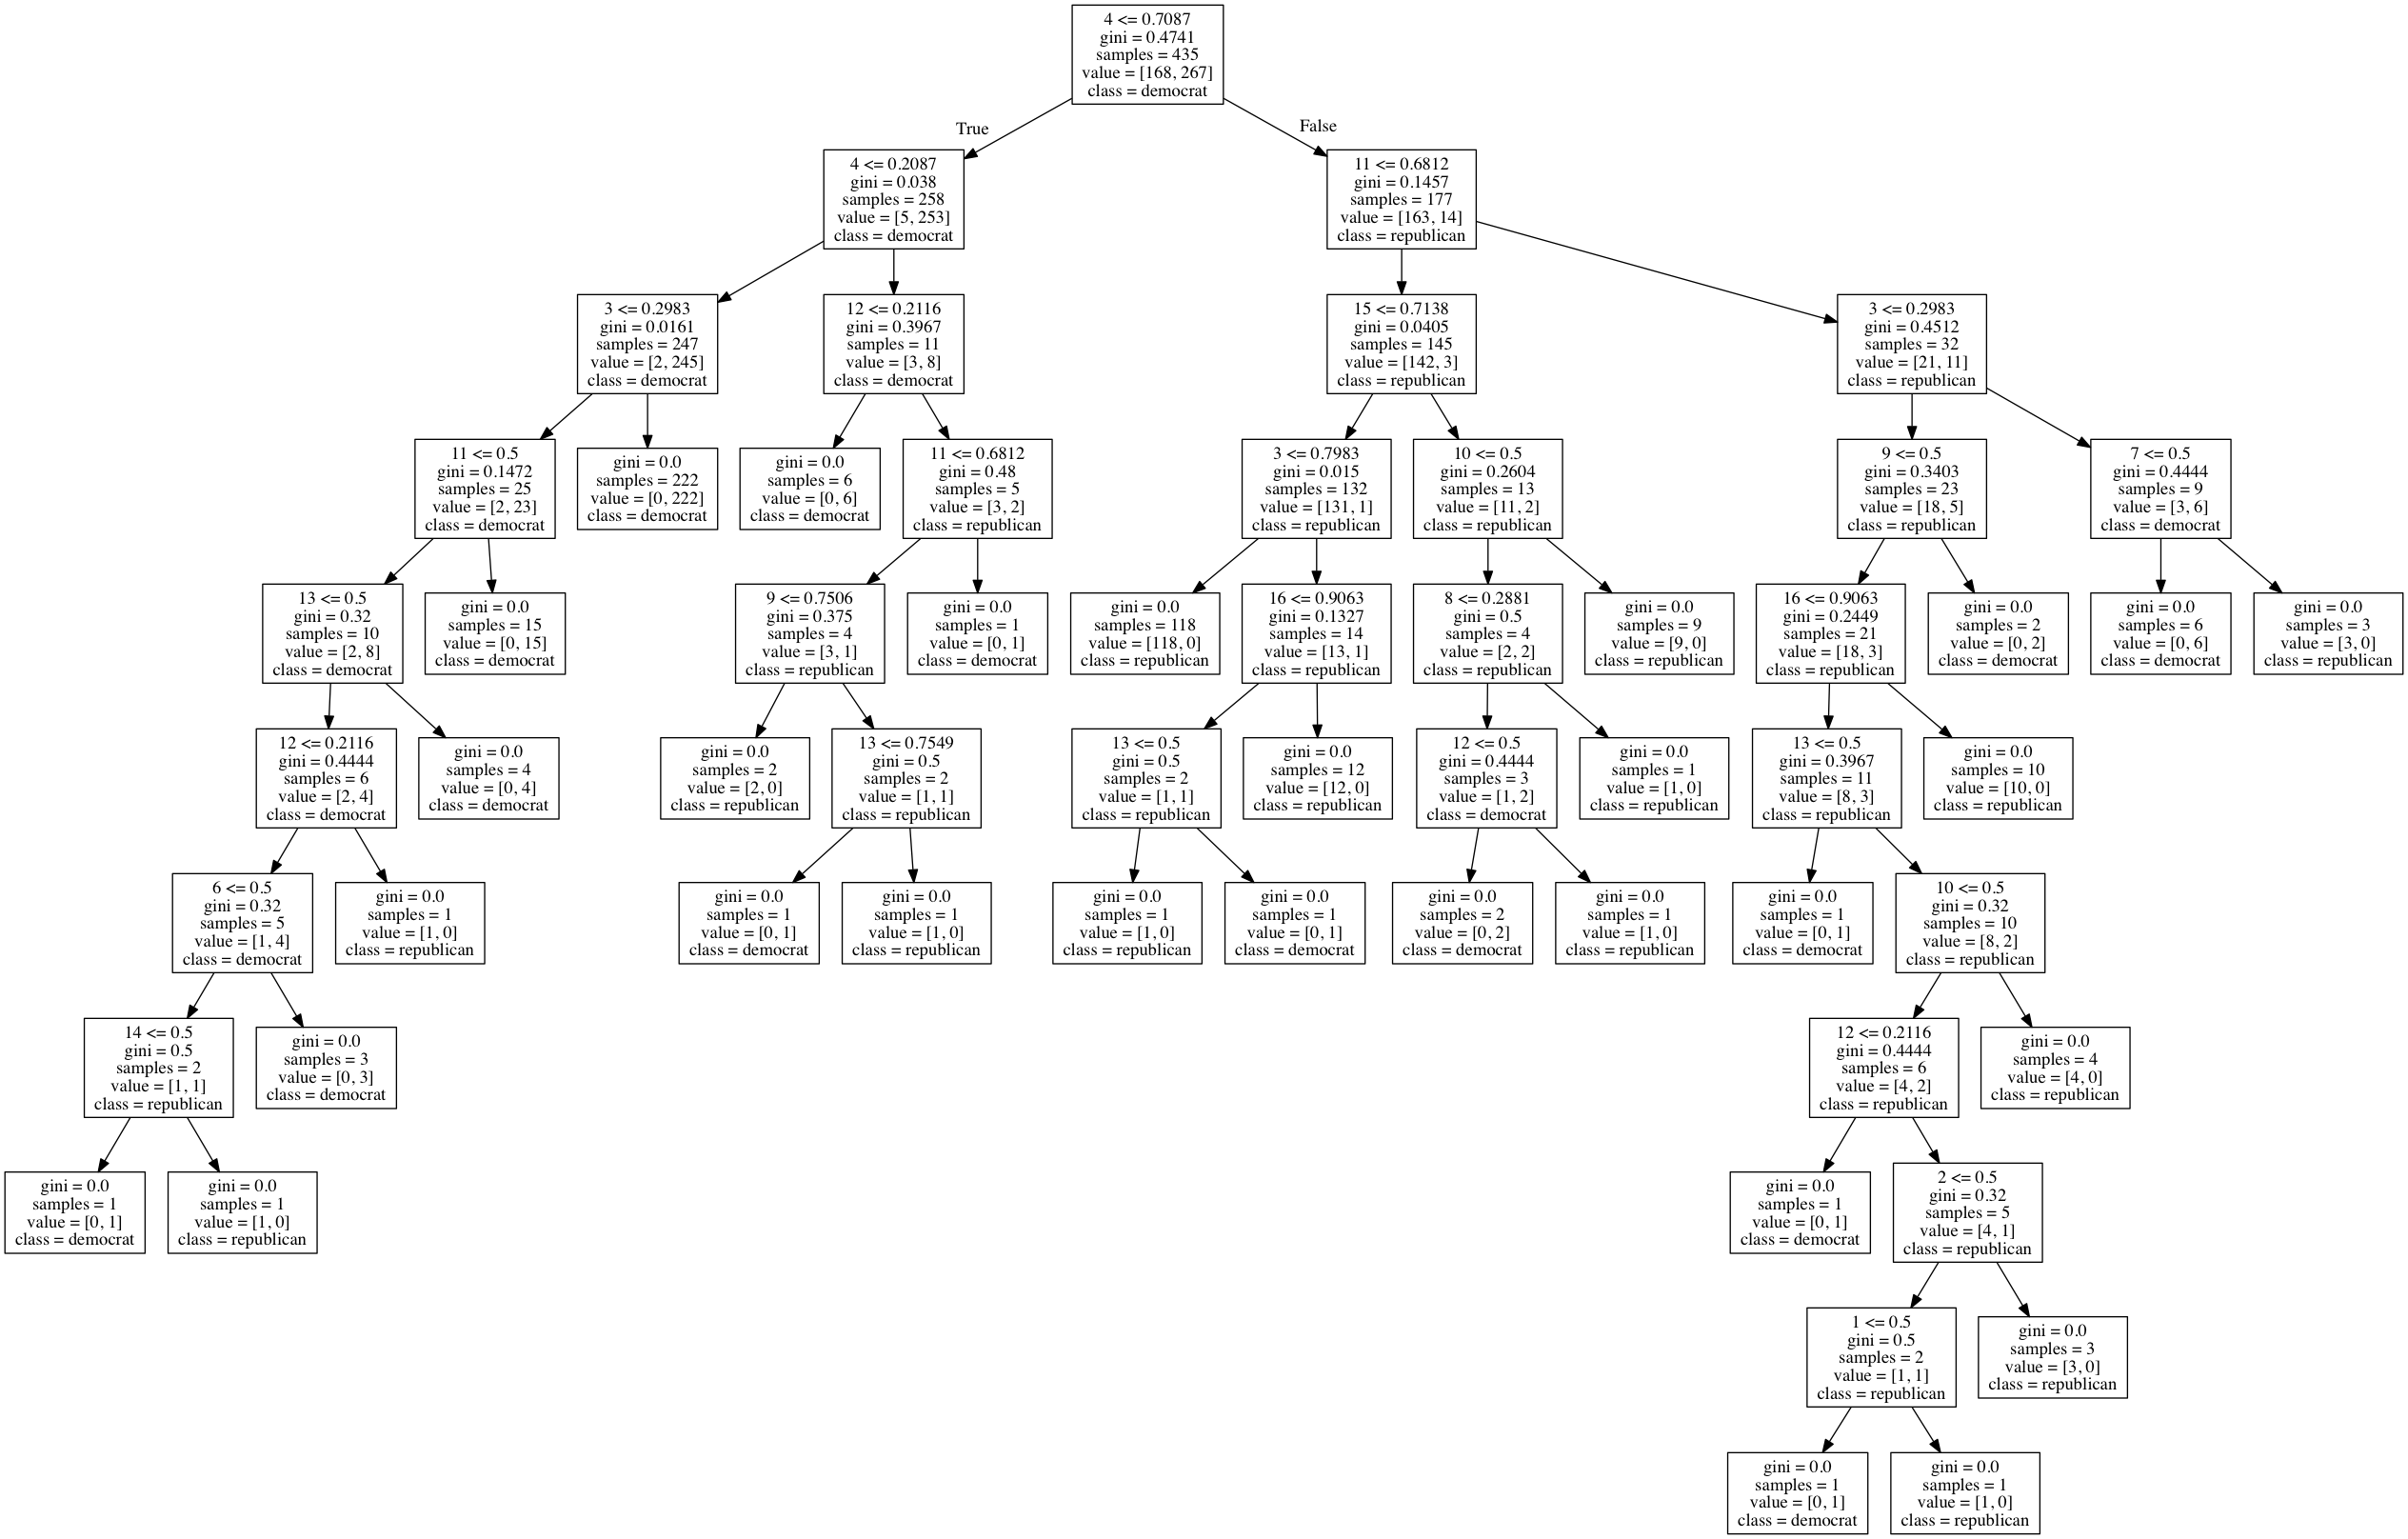

In [7]:
outputDTC(X,y,X.columns,['republican', 'democrat'], 'congress.pdf')

## Challenge 2
Fit and evaluate a decision tree classifier for your movie dataset. Examine the rules your tree uses.

In [8]:
movie_data = pd.read_csv('../../05-classification/ken_m/2015_movies.csv')

In [9]:
movie_data = movie_data[movie_data.columns[1:]].dropna(subset = ['Budget', 'DomesticTotalGross', 'Runtime'])

movie_data.loc[movie_data.Rating == 'G', 'Rating'] = int(0)
movie_data.loc[movie_data.Rating == 'PG', 'Rating'] = int(1)
movie_data.loc[movie_data.Rating == 'PG-13', 'Rating'] = int(2)
movie_data.loc[movie_data.Rating == 'R', 'Rating'] = int(3)
movie_data.loc[movie_data.Rating, 'Rating'] = movie_data.Rating.astype(int)

#Need to remove the lone G rating, it messes up cross_val_score
movie_data = movie_data[movie_data.Rating != 0]



In [10]:
X = movie_data[['Budget', 'DomesticTotalGross', 'Runtime']]
y = movie_data['Rating']

In [11]:
scorers = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
for score in scorers:
    s = np.mean(cross_val_score(DecisionTreeClassifier(), X, y, scoring=score, cv=4))
    print('{} : {}'.format(score, s))


accuracy : 0.34210526315789475
precision_weighted : 0.42256612174375335
recall_weighted : 0.37799043062200954
f1_weighted : 0.3931853567985006


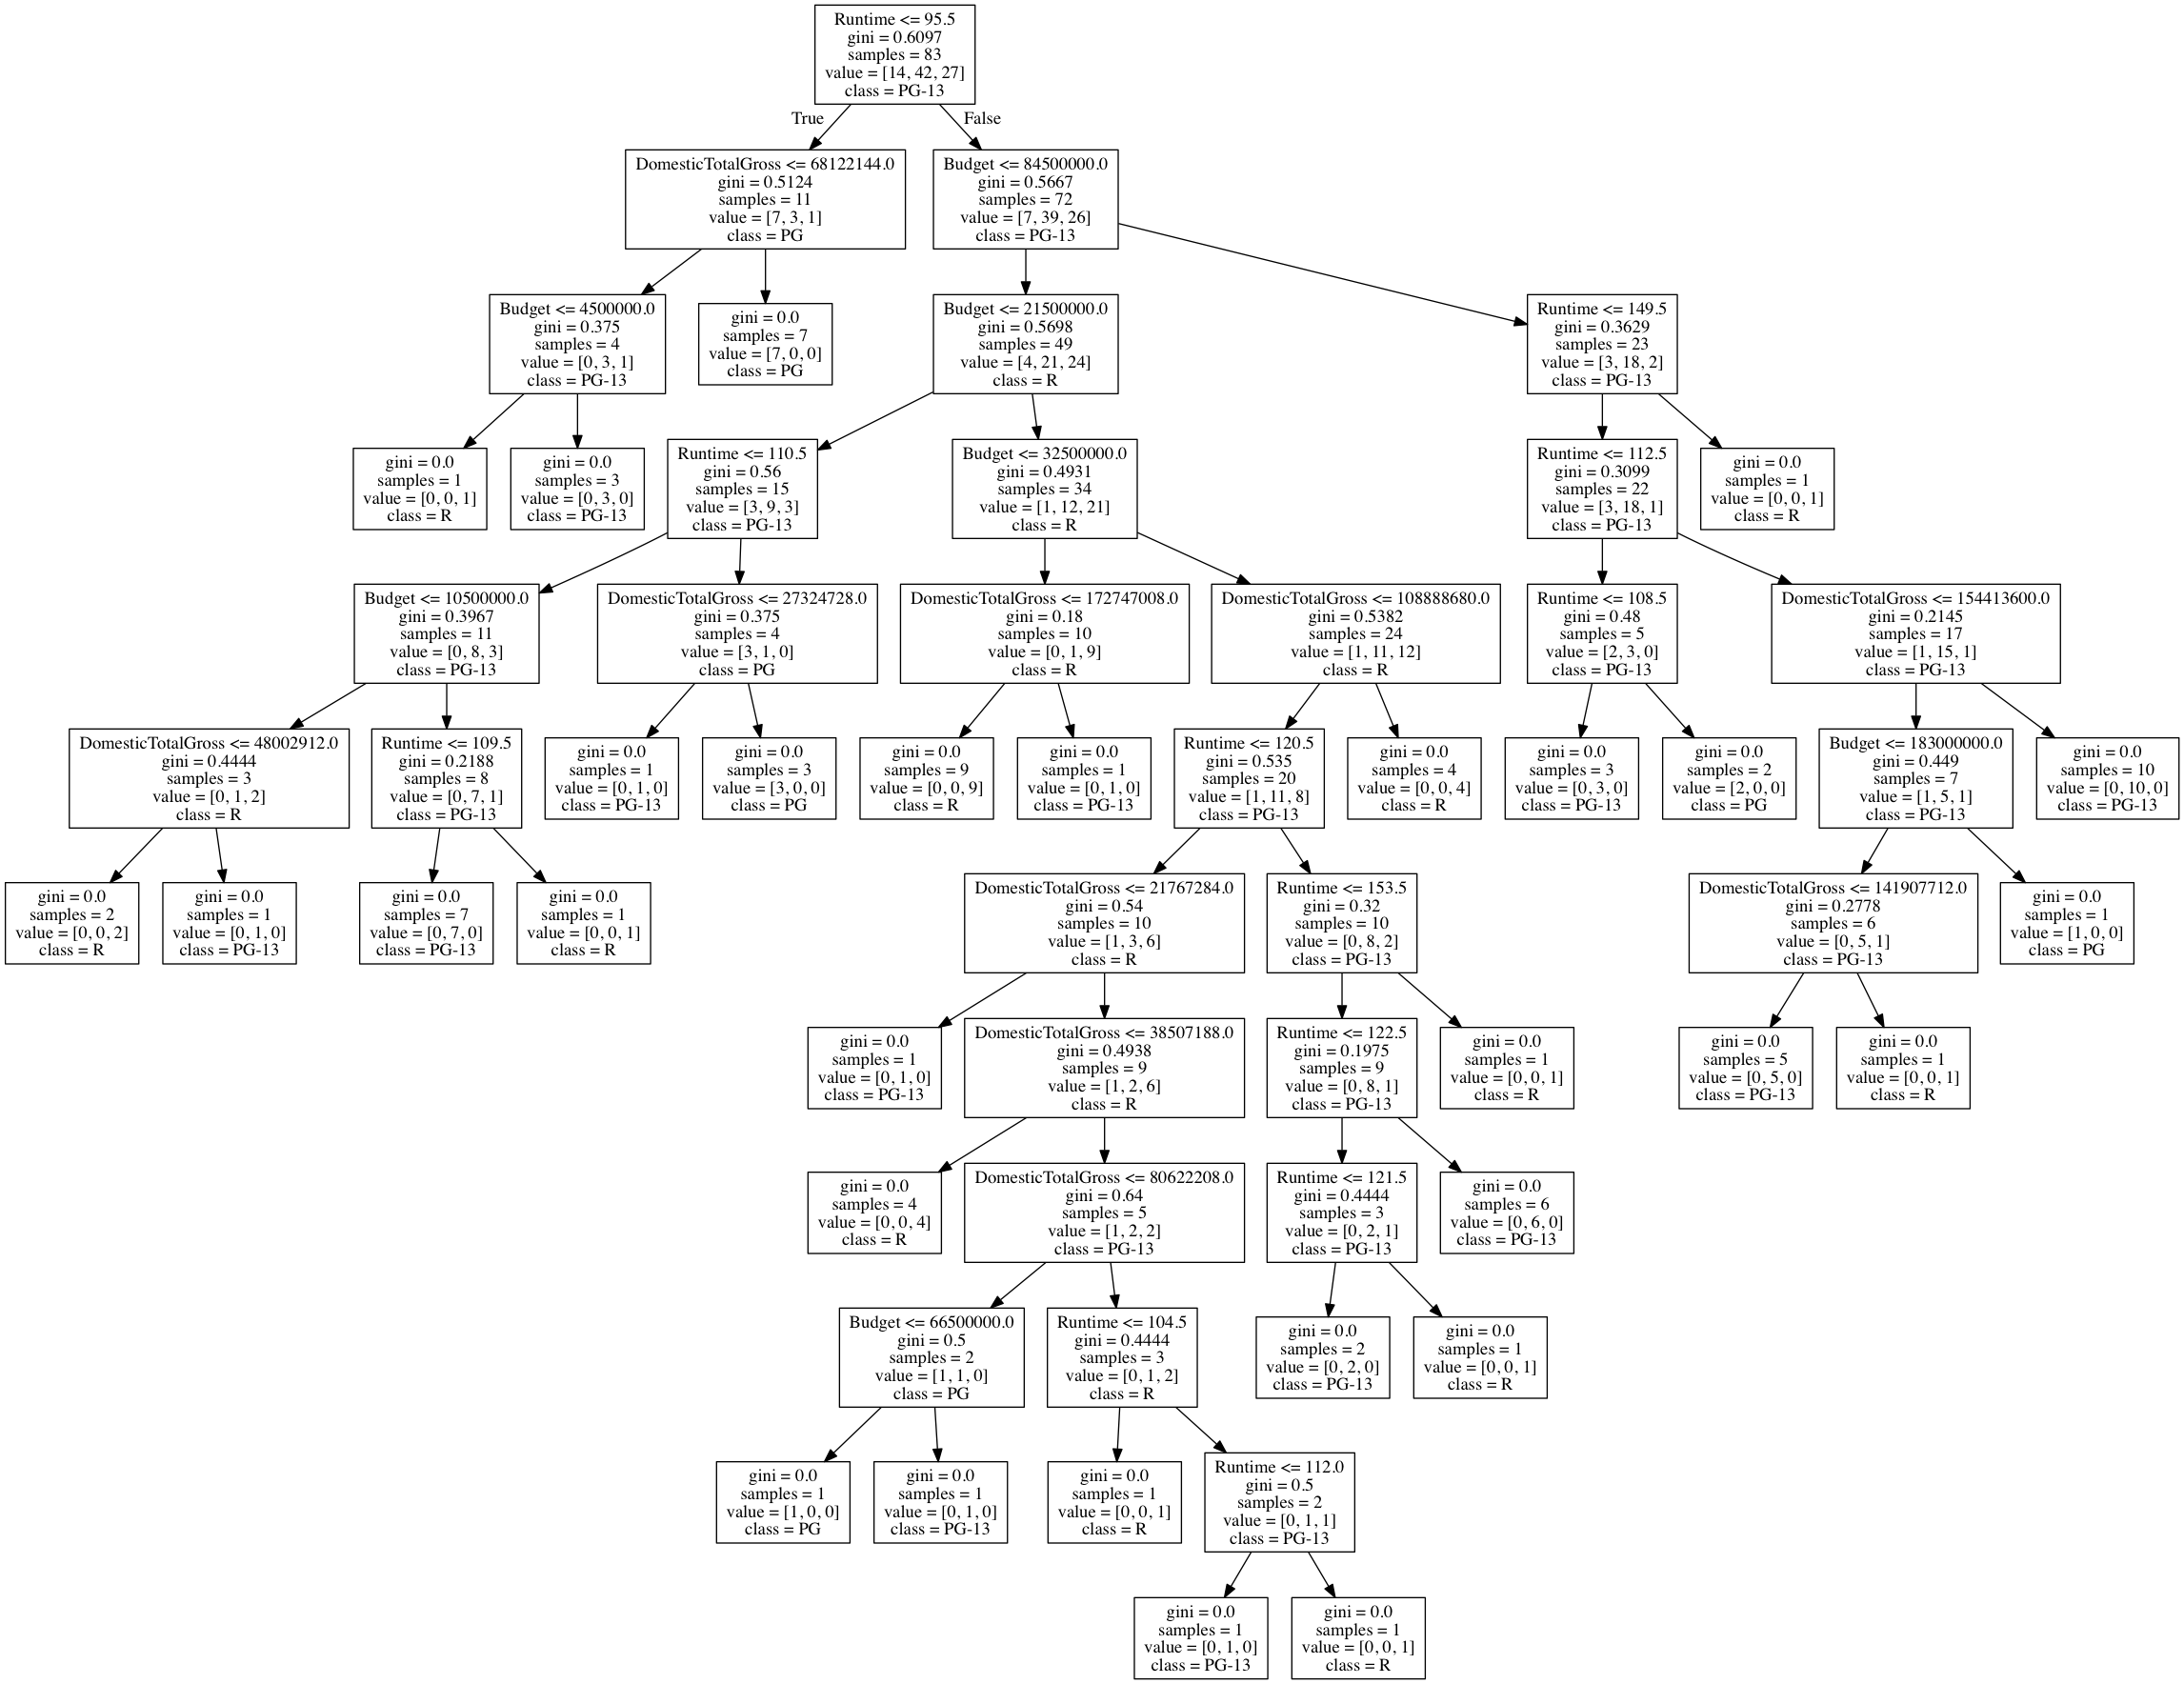

In [12]:
outputDTC(X, y, X.columns,['PG', 'PG-13', 'R'], 'movies.pdf')

## Challenge 3
Tackle the [Titanic Survivors kaggle competition](https://www.kaggle.com/c/titanic-gettingStarted) with decision trees. Look at your splits; how does your tree decide?

In [13]:
train_df = pd.read_csv('../../../kaggle/titanic/train.csv')
test_df = pd.read_csv('../../../kaggle/titanic/test.csv')

In [14]:
def manipulateDf(df):
    df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

    if len(df.Embarked[ df.Embarked.isnull() ]) > 0:
        df.loc[ df.Embarked.isnull(), 'Embarked' ] = df.Embarked.dropna().mode().values

    Ports = list(enumerate(np.unique(df['Embarked'])))
    Ports_dict = { name : i for i, name in Ports }              
    df.Embarked = df.Embarked.map( lambda x: Ports_dict[x]).astype(int)

    median_age = df['Age'].dropna().median()
    if len(df.Age[ df.Age.isnull() ]) > 0:
        df.loc[ (df.Age.isnull()), 'Age'] = median_age
        
    return df
   


In [15]:
train_df = manipulateDf(train_df)
test_df = manipulateDf(test_df)

In [16]:
features = ['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [17]:
X_train = train_df[features]
y_train = train_df['Survived']
X_test = test_df[features]

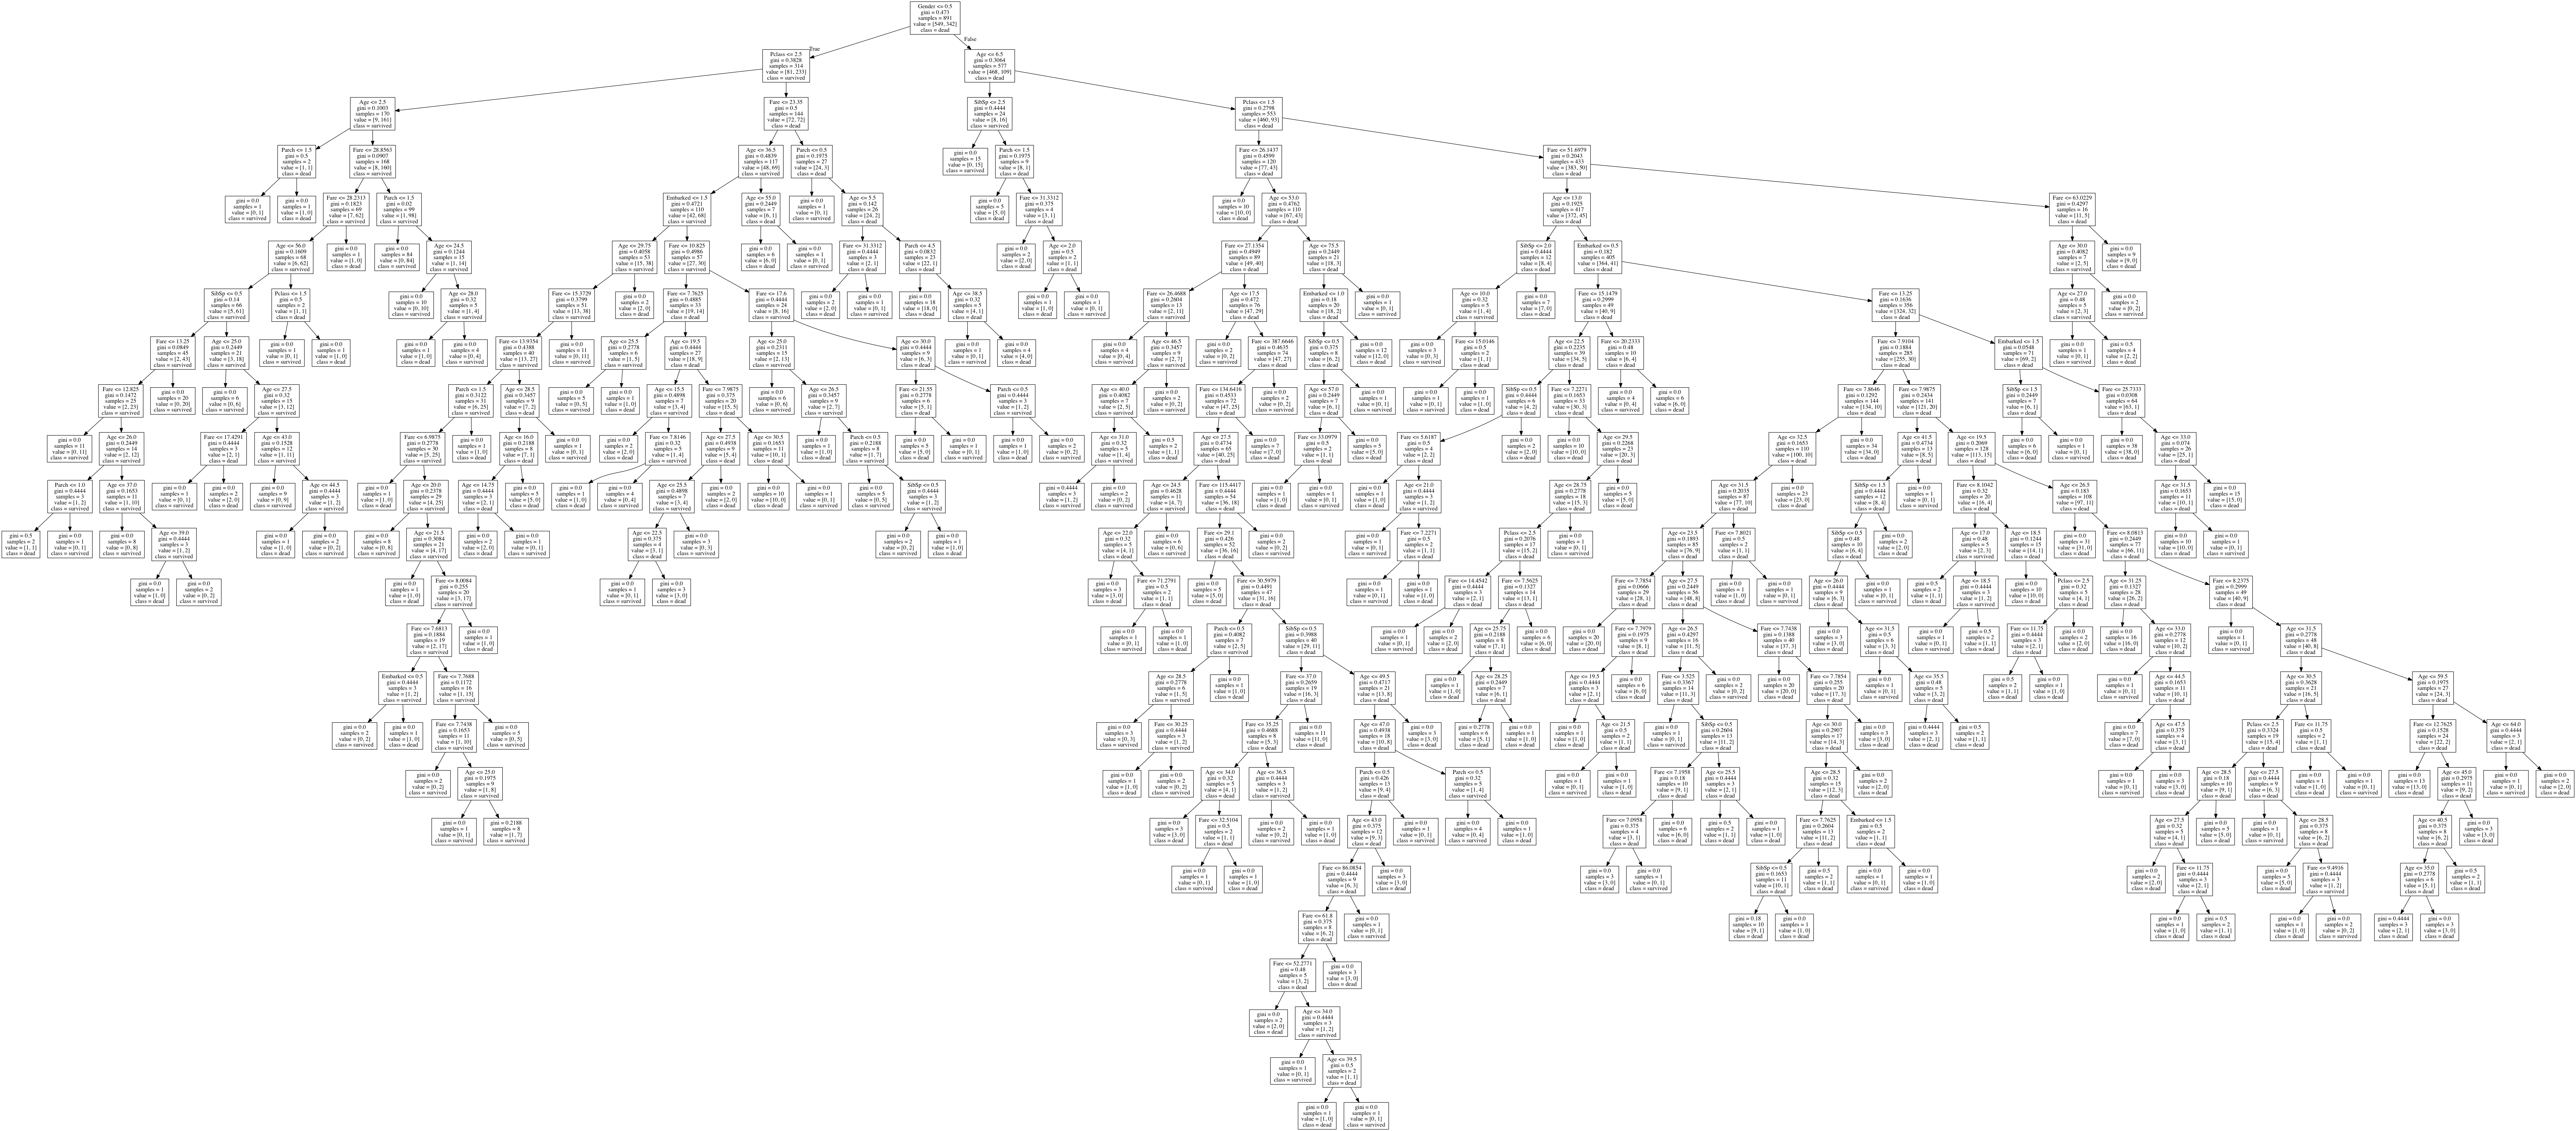

In [18]:
outputDTC(X_train, y_train, features, ['dead', 'survived'], 'titanic.pdf')

## Decision Tree Scores

In [19]:
scorers = ['accuracy', 'precision', 'recall', 'f1']
for score in scorers:
    s = np.mean(cross_val_score(DecisionTreeClassifier(), X_train, y_train, scoring=score, cv=10))
    print('{} : {}'.format(score, s))


accuracy : 0.7846529905799569
precision : 0.726413397194821
recall : 0.7222689075630251
f1 : 0.7209993176821727
